In [1]:
import math
import xarray as xr
import matplotlib.pyplot as plt 
import numpy as np 

In [2]:
level = np.linspace(0,50,6)
depth = 50 
time = np.linspace(0,364,365)
omg = (2*math.pi)/20
omg2 = (2*math.pi)/5
A2 = 1
A1 = 0.3*A2

u = np.full((int(len(time)),int(len(level))),np.nan)
u.shape

(365, 6)

In [3]:
level

array([ 0., 10., 20., 30., 40., 50.])

In [4]:
for t in range(len(time)): 
    for z in range(len(level)): 
        u[t,z] = A1*math.cos((math.pi/depth)*level[z])*math.cos(-omg*time[t]) #+ A2*math.cos((math.pi/depth)*level[z])*math.cos(-omg2*time[t])
        

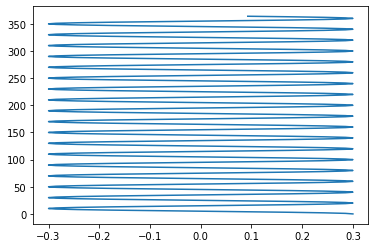

In [5]:
plt.plot(u[:,0],time)

In [6]:
u.shape

(365, 6)

In [7]:
cov = np.cov(u.T, bias=True) # uten .T ble den en 73x73 matrise 
values, vectors = np.linalg.eig(cov)
print('values: ', values) 
print('------------------------------------------------------')    
print('values[0]: ', values[0])
print('------------------------------------------------------') 
print('vectors: ', vectors) 
print('------------------------------------------------------')
print('vectors[0]: ', vectors[0]) 

order = values.argsort()[::-1]
values_, vectors_ = values[order], vectors[:, order]

print('-----------------------------------------------------------')
print('-----------------------------------------------------------')

print(cov.shape) 
print('cov :', cov)
print('------------------------------------------------------')    
print('values: ',values_) 
print('------------------------------------------------------')    
print('values[0]: ',values_[0]) 
print('------------------------------------------------------')    
print('vectors: ',vectors_) 
print('------------------------------------------------------') 
print('vectors[0]: ',vectors_[0]) 

values:  [ 1.57899888e-01 -1.91012355e-17 -9.08768063e-17  7.02216535e-18
 -1.63731703e-18  1.42975596e-18]
------------------------------------------------------
values[0]:  0.15789988806007912
------------------------------------------------------
vectors:  [[-0.53452248  0.65375616 -0.5734957   0.01977144  0.0046594  -0.00559866]
 [-0.43243777  0.06491819  0.50603207 -0.56150948 -0.15678955 -0.23212657]
 [-0.16517653 -0.11185524  0.03490427 -0.47587879 -0.1163481   0.95496206]
 [ 0.16517653  0.07981811 -0.07203609  0.20380574 -0.97367177 -0.06657051]
 [ 0.43243777 -0.106909   -0.55470045 -0.63118184  0.03961919 -0.05196718]
 [ 0.53452248  0.73353695  0.31770132 -0.13389652  0.11068898  0.16432025]]
------------------------------------------------------
vectors[0]:  [-0.53452248  0.65375616 -0.5734957   0.01977144  0.0046594  -0.00559866]
-----------------------------------------------------------
-----------------------------------------------------------
(6, 6)
cov : [[ 0.04511425 

In [8]:
print(values[0])
print('---------------------')
print(values_[0])

0.15789988806007912
---------------------
0.15789988806007912


In [9]:
print(values)
print('---------------------')
print(values_)

[ 1.57899888e-01 -1.91012355e-17 -9.08768063e-17  7.02216535e-18
 -1.63731703e-18  1.42975596e-18]
---------------------
[ 1.57899888e-01  7.02216535e-18  1.42975596e-18 -1.63731703e-18
 -1.91012355e-17 -9.08768063e-17]


In [10]:
print(vectors[0])
print('---------------------')
print(vectors_[0])

[-0.53452248  0.65375616 -0.5734957   0.01977144  0.0046594  -0.00559866]
---------------------
[-0.53452248  0.01977144 -0.00559866  0.0046594   0.65375616 -0.5734957 ]


In [11]:
print(vectors)
print('---------------------')
print(vectors_)

[[-0.53452248  0.65375616 -0.5734957   0.01977144  0.0046594  -0.00559866]
 [-0.43243777  0.06491819  0.50603207 -0.56150948 -0.15678955 -0.23212657]
 [-0.16517653 -0.11185524  0.03490427 -0.47587879 -0.1163481   0.95496206]
 [ 0.16517653  0.07981811 -0.07203609  0.20380574 -0.97367177 -0.06657051]
 [ 0.43243777 -0.106909   -0.55470045 -0.63118184  0.03961919 -0.05196718]
 [ 0.53452248  0.73353695  0.31770132 -0.13389652  0.11068898  0.16432025]]
---------------------
[[-0.53452248  0.01977144 -0.00559866  0.0046594   0.65375616 -0.5734957 ]
 [-0.43243777 -0.56150948 -0.23212657 -0.15678955  0.06491819  0.50603207]
 [-0.16517653 -0.47587879  0.95496206 -0.1163481  -0.11185524  0.03490427]
 [ 0.16517653  0.20380574 -0.06657051 -0.97367177  0.07981811 -0.07203609]
 [ 0.43243777 -0.63118184 -0.05196718  0.03961919 -0.106909   -0.55470045]
 [ 0.53452248 -0.13389652  0.16432025  0.11068898  0.73353695  0.31770132]]


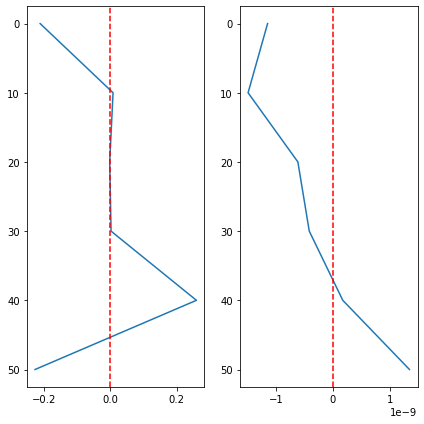

In [12]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize = (7,7))

ax1.plot(vectors_[0]*np.sqrt(values_[0]),level)
ax1.axvline(0, color='r', linestyle = '--')
ax1.invert_yaxis()

ax2.plot(vectors_[1]*np.sqrt(values_[1]),level)
ax2.axvline(0, color='r', linestyle = '--')
ax2.invert_yaxis()

In [13]:
cov = np.cov(u.T, bias=True) # uten .T ble den en 73x73 matrise 
values, vectors = np.linalg.eig(cov)
order = values.argsort()[::-1]
values_, vectors_ = values[order], vectors[order,:]

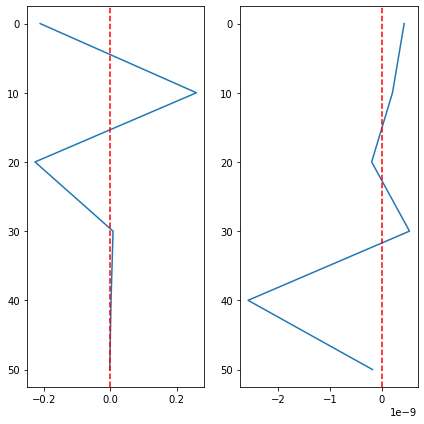

In [14]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize = (7,7))

ax1.plot(vectors_[0]*np.sqrt(values_[0]),level)
ax1.axvline(0, color='r', linestyle = '--')
ax1.invert_yaxis()

ax2.plot(vectors_[1]*np.sqrt(values_[1]),level)
ax2.axvline(0, color='r', linestyle = '--')
ax2.invert_yaxis()

In [15]:
print(values[0])
print('---------------------')
print(values_[0])

0.15789988806007912
---------------------
0.15789988806007912


In [16]:
print(values)
print('---------------------')
print(values_)

[ 1.57899888e-01 -1.91012355e-17 -9.08768063e-17  7.02216535e-18
 -1.63731703e-18  1.42975596e-18]
---------------------
[ 1.57899888e-01  7.02216535e-18  1.42975596e-18 -1.63731703e-18
 -1.91012355e-17 -9.08768063e-17]


In [17]:
print(vectors[0])
print('---------------------')
print(vectors_[0])

[-0.53452248  0.65375616 -0.5734957   0.01977144  0.0046594  -0.00559866]
---------------------
[-0.53452248  0.65375616 -0.5734957   0.01977144  0.0046594  -0.00559866]


In [18]:
print(vectors)
print('---------------------')
print(vectors_)

[[-0.53452248  0.65375616 -0.5734957   0.01977144  0.0046594  -0.00559866]
 [-0.43243777  0.06491819  0.50603207 -0.56150948 -0.15678955 -0.23212657]
 [-0.16517653 -0.11185524  0.03490427 -0.47587879 -0.1163481   0.95496206]
 [ 0.16517653  0.07981811 -0.07203609  0.20380574 -0.97367177 -0.06657051]
 [ 0.43243777 -0.106909   -0.55470045 -0.63118184  0.03961919 -0.05196718]
 [ 0.53452248  0.73353695  0.31770132 -0.13389652  0.11068898  0.16432025]]
---------------------
[[-0.53452248  0.65375616 -0.5734957   0.01977144  0.0046594  -0.00559866]
 [ 0.16517653  0.07981811 -0.07203609  0.20380574 -0.97367177 -0.06657051]
 [ 0.53452248  0.73353695  0.31770132 -0.13389652  0.11068898  0.16432025]
 [ 0.43243777 -0.106909   -0.55470045 -0.63118184  0.03961919 -0.05196718]
 [-0.43243777  0.06491819  0.50603207 -0.56150948 -0.15678955 -0.23212657]
 [-0.16517653 -0.11185524  0.03490427 -0.47587879 -0.1163481   0.95496206]]
